# 1. Introdução e Importação dos dados



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregamento dos dados com coluna de origem
loja1 = pd.read_csv(url1)
loja1["Loja Origem"] = "Loja 1"

loja2 = pd.read_csv(url2)
loja2["Loja Origem"] = "Loja 2"

loja3 = pd.read_csv(url3)
loja3["Loja Origem"] = "Loja 3"

loja4 = pd.read_csv(url4)
loja4["Loja Origem"] = "Loja 4"

# Concatenar todos os dataframes
lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Visualizar as primeiras linhas
lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja Origem
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#2. Análise do faturamento


In [9]:
# Criar um dicionário para armazenar o faturamento de cada loja por ano
faturamento_por_loja = {}

# Listar todas as lojas únicas
lojas_unicas = lojas["Loja Origem"].unique()

# Calcular o faturamento por ano para cada loja
for loja in lojas_unicas:
    # Filtrar os dados para a loja específica
    dados_loja = lojas[lojas["Loja Origem"] == loja]

    # Calcular o faturamento por ano e arredondar para 2 casas decimais
    faturamento_por_ano = dados_loja.groupby("Ano")["Preço"].sum().round(2).to_dict()

    # Armazenar o faturamento no dicionário
    faturamento_por_loja[loja] = faturamento_por_ano

# Exibir os resultados
for loja, faturamento in faturamento_por_loja.items():
    print(f"Faturamento de {loja}: {faturamento}")

Faturamento de Loja 1: {2020: 491911.51, 2021: 482829.91, 2022: 422086.24, 2023: 137681.46}
Faturamento de Loja 2: {2020: 427288.25, 2021: 468288.89, 2022: 477635.56, 2023: 115246.36}
Faturamento de Loja 3: {2020: 428943.09, 2021: 483938.91, 2022: 467250.7, 2023: 83892.33}
Faturamento de Loja 4: {2020: 441129.52, 2021: 463763.27, 2022: 402961.23, 2023: 76643.56}


In [12]:
# Calcular o faturamento total por loja
faturamento_total_loja = lojas.groupby("Loja Origem")["Preço"].sum().round(2)

# Verificar o resultado
print(faturamento_total_loja)

Loja Origem
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


<ipython-input-18-3210d026bf12>:14: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(


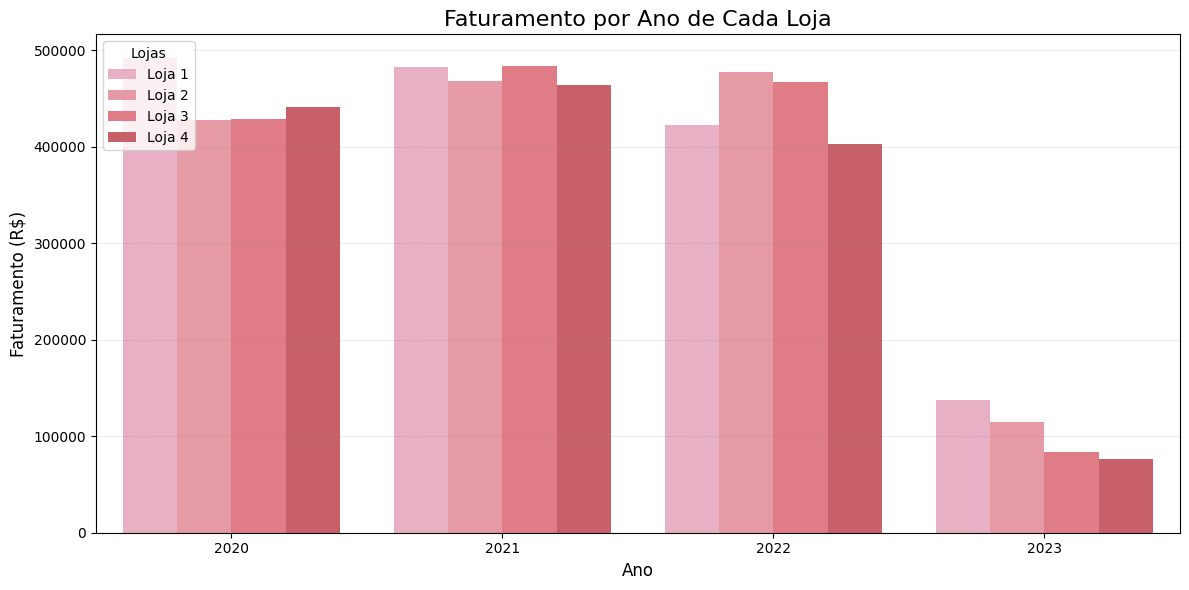

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Arredondar os valores de faturamento para facilitar a leitura
faturamento_ano_loja["Preço"] = faturamento_ano_loja["Preço"].round(2)

# Definir a paleta de cores Pantone: transição de rosa para roxo
cores = ["#FF007F", "#FF4FA3", "#D10072", "#A0006E", "#800080", "#5E005E"]

# Plotar gráfico de barras verticais
plt.figure(figsize=(12, 6))

# Criar gráfico de barras
sns.barplot(
    data=faturamento_ano_loja,
    x="Ano",
    y="Preço",
    hue="Loja Origem",
    palette=cores_pantone
)

# Detalhes visuais
plt.title("Faturamento por Ano de Cada Loja", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Lojas", loc="upper left")

# Adicionar linhas de referência (grid lines) em cinza claro
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.3)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [31]:
# Verificar a última data de venda
primeira_venda = lojas["Data da Compra"].min()
ultima_venda = lojas["Data da Compra"].max()

print("Primeira venda realizada em:", primeira_venda.strftime("%d/%m/%Y"))
print("Última venda realizada em:", ultima_venda.strftime("%d/%m/%Y"))

Primeira venda realizada em: 01/01/2020
Última venda realizada em: 31/03/2023


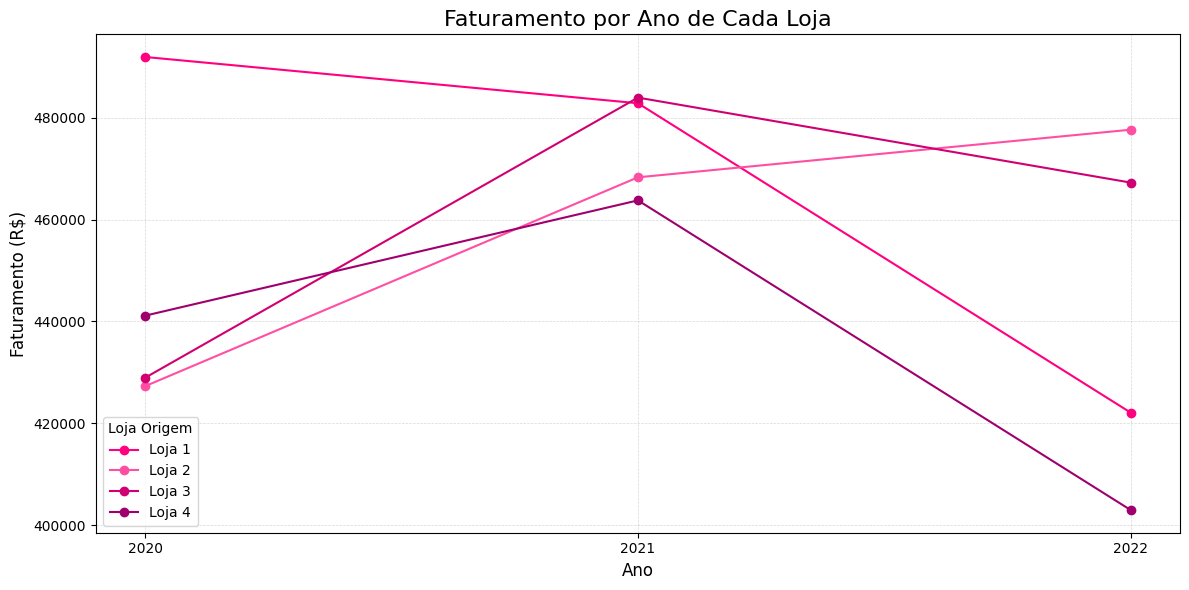

In [17]:
# Filtrando dados para os anos de 2020 a 2022
faturamentos = faturamento_ano_loja[faturamento_ano_loja["Ano"].isin([2020, 2021, 2022])]

# Plotar gráfico de linhas
plt.figure(figsize=(12, 6))

# Criar uma linha para cada loja
for i, loja in enumerate(faturamentos["Loja Origem"].unique()):
    dados_loja = faturamentos[faturamentos["Loja Origem"] == loja]
    plt.plot(dados_loja["Ano"],
             dados_loja["Preço"],
             marker='o',
             label=loja,
             color=cores[i % len(cores)]
             )

# Detalhes visuais
plt.title("Faturamento por Ano de Cada Loja", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)
plt.xticks([2020, 2021, 2022])
plt.legend(title="Loja Origem")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.3)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [33]:
# Calcular o faturamento por loja e ano
faturamento_ano_loja = lojas.groupby(["Ano", "Loja Origem"])["Preço"].sum().reset_index()

# Filtrar para os anos de 2020 a 2022
faturamento_ano_loja = faturamento_ano_loja[faturamento_ano_loja["Ano"].isin([2020, 2021, 2022])]

# Ordenar por loja e ano
faturamento_ano_loja = faturamento_ano_loja.sort_values(by=["Loja Origem", "Ano"])

# Calcular o faturamento do ano anterior por loja
faturamento_ano_loja["Faturamento Ano Anterior"] = faturamento_ano_loja.groupby("Loja Origem")["Preço"].shift(1)

# Calcular a variação YoY em relação ao ano anterior
faturamento_ano_loja["Variação YoY"] = ((faturamento_ano_loja["Preço"] / faturamento_ano_loja["Faturamento Ano Anterior"]) - 1) * 100

# Filtrar apenas os anos que têm comparação (2021 e 2022)
faturamento_yoy = faturamento_ano_loja[faturamento_ano_loja["Ano"].isin([2021, 2022])]

# Agrupar o resultado em dicionários por loja
faturamento_comparativo_loja = faturamento_yoy.groupby("Loja Origem")[["Ano", "Variação YoY"]].apply(lambda x: x.set_index("Ano")["Variação YoY"].to_dict()).reset_index()

# Exibir os resultados agrupados por loja
print(faturamento_comparativo_loja)

  Loja Origem                                                  0
0      Loja 1  {2021: -1.846185709295567, 2022: -12.580759547...
1      Loja 2  {2021: 9.595545863945487, 2022: 1.995919655492...
2      Loja 3  {2021: 12.821239293072662, 2022: -3.4484125279...
3      Loja 4  {2021: 5.130862699916339, 2022: -13.1105768682...


In [48]:
# TICKET MÉDIO POR LOJA

# Faturamento total por loja
faturamento_total_loja = lojas.groupby("Loja Origem")["Preço"].sum().round(2)

# Quantidade de vendas por loja
quantidade_vendas_loja = lojas.groupby("Loja Origem").size()

# Ticket médio por loja
ticket_medio = (faturamento_total_loja / quantidade_vendas_loja).round(2)

print(ticket_medio)

Loja Origem
Loja 1    650.49
Loja 2    630.97
Loja 3    620.61
Loja 4    587.15
dtype: float64


In [52]:
# Total de vendas (quantidade) por loja
total_vendas_por_loja = lojas.groupby("Loja Origem").size().reset_index(name='Quantidade de Vendas')

# Visualizar
print(total_vendas_por_loja)

  Loja Origem  Quantidade de Vendas
0      Loja 1                  2359
1      Loja 2                  2359
2      Loja 3                  2359
3      Loja 4                  2358


## 2.1 Analisando o faturamento anual das lojas (YoY)

Considerando o faturamento total das lojas no período analisado (Jan/2020 a Mar/2023), a Loja 1 apresenta maior faturamento, sendo 10,8% superior à Loja 4 (último lugar em faturamento).

Avaliando o YoY (análise de faturamento Ano a Ano), percebemos que a Loja 1 teve queda suave de vendas em 2021 e expressiva (12,6%) em 2022. A Loja 1 também apresenta o maior ticket médio de vendas entre toda a rede de lojas.

A Loja 2 apresenta aumento no faturamento de quase 10% em 2021 e de 2% em 2022 (única com faturamento positivo).

A Loja 3 possui a melhor evolução de faturamento entre as 4 lojas no ano de 2021, tendo uma queda leve (3,5%) em 2022.

A Loja 4 teve um crescimento leve no faturamento em 2021 mas teve a maior involução em 2022, com mais de 13% de queda no faturamento. Também apresenta o menor ticket médio entre todas as lojas, 10% menor que o da Loja 1.

Em todo período analisado, as lojas tiveram praticamente a mesma quantidade de vendas, mas o fator determinante do sucesso da Loja 1 se deve ao seu ticket médio, onde produtos de maior valor agregado são mais comercializados do que nas demais.

Como 2023 teve a última venda apurada em 31/03/2023, vou analisar o faturamento trimestral das lojas, comparando com os outros primeiros trimestres de cada ano. Poderia fazer uma média ponderada para avaliar como um ano completo mas este critério não seria preciso devido à sazonalidade de vendas.

In [35]:
# Filtrar apenas dados de janeiro a março
lojas_trim1 = lojas[lojas["Data da Compra"].dt.month <= 3]

# Agrupar faturamento por ano e loja no 1º trimestre
faturamento_trim1 = lojas_trim1.groupby(["Ano", "Loja Origem"])["Preço"].sum().reset_index()

# Verificar os dados
faturamento_trim1

,Ano,Loja Origem,Preço
0,2020,Loja 1,139601.26
1,2020,Loja 2,105378.42
2,2020,Loja 3,108513.54
3,2020,Loja 4,94283.75
4,2021,Loja 1,116693.56
5,2021,Loja 2,108139.10
6,2021,Loja 3,94524.20
7,2021,Loja 4,123312.88
8,2022,Loja 1,105866.59
9,2022,Loja 2,116855.89


In [36]:
# Definindo o período apurado
lojas_trim1 = lojas[lojas["Data da Compra"].dt.month <= 3]

# Calcular o faturamento total por loja
faturamento_total_1T = lojas_trim1.groupby('Loja Origem')['Preço'].sum()

# Imprimir o faturamento total de cada loja
faturamento_total_1T


,Preço
Loja Origem,
Loja 1,499842.87
Loja 2,445619.77
Loja 3,405974.16
Loja 4,424761.61


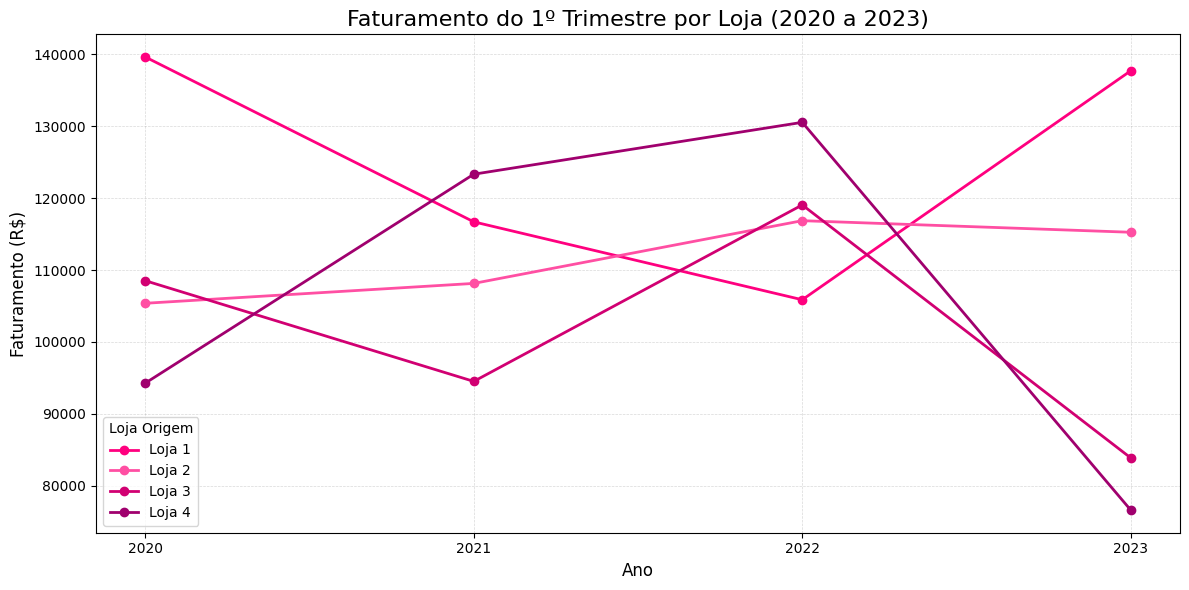

In [20]:
# Paleta com cores intensas entre rosa e roxo
cores_pantone_intensa = ["#FF007F", "#FF4FA3", "#D10072", "#A0006E", "#800080", "#5E005E"]

# Gráfico de evolução do faturamento no 1º trimestre por loja
plt.figure(figsize=(12, 6))

for i, loja in enumerate(faturamento_trim1["Loja Origem"].unique()):
    dados_loja = faturamento_trim1[faturamento_trim1["Loja Origem"] == loja]
    plt.plot(
        dados_loja["Ano"],
        dados_loja["Preço"],
        marker='o',
        label=loja,
        color=cores_pantone_intensa[i % len(cores_pantone_intensa)],
        linewidth=2
    )

# Customizações do gráfico
plt.title("Faturamento do 1º Trimestre por Loja (2020 a 2023)", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)
plt.xticks([2020, 2021, 2022, 2023])
plt.legend(title="Loja Origem")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.3)
plt.tight_layout()

# Exibir
plt.show()

In [32]:
# Garantir que a coluna "Data da Compra" seja datetime
lojas["Data da Compra"] = pd.to_datetime(lojas["Data da Compra"])

# Filtrar dados para o primeiro trimestre (janeiro a março)
lojas_q1 = lojas[lojas["Data da Compra"].dt.month.isin([1, 2, 3])]

# Calcular o faturamento por loja e ano para o primeiro trimestre
faturamento_q1_loja = lojas_q1.groupby(["Ano", "Loja Origem"])["Preço"].sum().reset_index()

# Ordenar por loja e ano para facilitar o cálculo do YoY
faturamento_q1_loja = faturamento_q1_loja.sort_values(by=["Loja Origem", "Ano"])

# Calcular a variação YoY com base no ano anterior
faturamento_q1_loja["Variação YoY"] = faturamento_q1_loja.groupby("Loja Origem")["Preço"].pct_change() * 100

# Filtrar para mostrar apenas os anos de 2021 a 2023 (os que têm ano anterior para comparar)
faturamento_comparativo_q1_pivot = faturamento_q1_loja[faturamento_q1_loja["Ano"].isin([2021, 2022, 2023])]

# Transformar em tabela com lojas como linhas e anos como colunas
faturamento_comparativo_q1_pivot = faturamento_comparativo_q1_pivot.pivot(index="Loja Origem", columns="Ano", values="Variação YoY").reset_index()

# Exibir a tabela formatada
print(faturamento_comparativo_q1_pivot)

Ano Loja Origem       2021       2022       2023
0        Loja 1 -16.409379  -9.278121  30.051851
1        Loja 2   2.619777   8.060720  -1.377363
2        Loja 3 -12.891792  25.940331 -29.528354
3        Loja 4  30.789113   5.845732 -41.278941


## 2.2 Analisando o faturamento do 1ºT (QoQ)

Mesmo com os resultados negativos em 2021 e 2022, a loja 1 ainda apresenta o maior faturamento no consolidado dos primeiros trimestres. A recuperação de 30% no 1T/2023 evidencia a força de venda da loja.

A Loja 2 aparece em 2º lugar. O resultado levemente negativo em 2023 contrasta com a evolução nos anos anteriores onde teve crescimento de 2,6% em 2021 e 8% em 2022.

A Loja 3 tem apresentado oscilação muito expressiva. Tendo o **pior** resultado dos faturamentos consolidados (quase 19% menor que a Loja 1). Teve quedas expressivas em 2021 (12%) e 2023 (quase 30%), intercalada com um crescimento de quase 26% em 2022.

A Loja 4 apresenta o 3º pior resultado, apesar dos crescimentos em 2021 e 2022, o faturamento de 2023 caiu 41%, depois de uma queda de 13% no faturamento de 2022. A Loja apresenta problemas graves no momento e a queda constante gera um sinal de alerta.

# 3. Vendas por Categoria


In [57]:
# Vendas por Categoria
vendas_por_categoria = lojas.groupby('Categoria do Produto').size().reset_index(name='Quantidade de Vendas')

vendas_por_categoria.sort_values(by='Quantidade de Vendas')


,Categoria do Produto,Quantidade de Vendas
7,utilidades domesticas,730
5,livros,742
4,instrumentos musicais,753
3,esporte e lazer,1113
1,eletrodomesticos,1149
0,brinquedos,1290
2,eletronicos,1772
6,moveis,1886


In [43]:
tabela_categorias_por_loja = vendas_por_categoria_loja.pivot(index='Loja Origem',
                                                             columns='Categoria do Produto',
                                                             values='Quantidade de Vendas').fillna(0)

print(tabela_categorias_por_loja)


Categoria do Produto  brinquedos  eletrodomesticos  eletronicos  \
Loja Origem                                                       
Loja 1                       324               312          448   
Loja 2                       313               305          422   
Loja 3                       315               278          451   
Loja 4                       338               254          451   

Categoria do Produto  esporte e lazer  instrumentos musicais  livros  moveis  \
Loja Origem                                                                    
Loja 1                            284                    182     173     465   
Loja 2                            275                    224     197     442   
Loja 3                            277                    177     185     499   
Loja 4                            277                    170     187     480   

Categoria do Produto  utilidades domesticas  
Loja Origem                                  
Loja 1                  

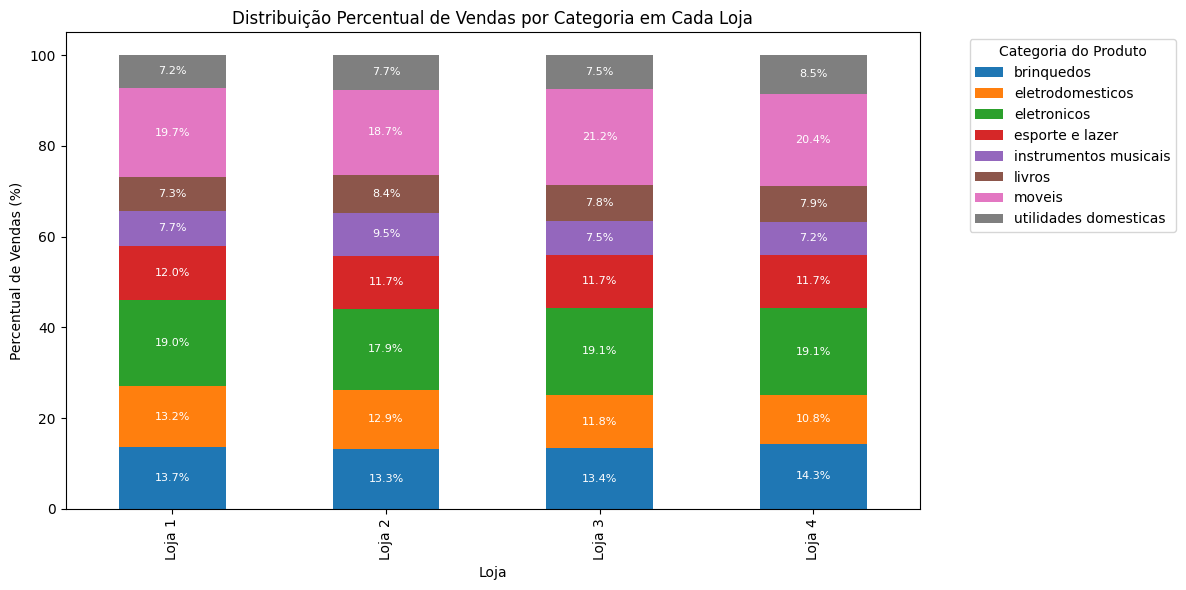

In [46]:
# Calcula os percentuais por linha (loja)
percentuais = tabela_categorias_por_loja.div(tabela_categorias_por_loja.sum(axis=1), axis=0) * 100

# Plotar gráfico de barras empilhadas com paleta personalizada
ax = percentuais.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adicionar rótulos com os percentuais
for i, loja in enumerate(percentuais.index):
    acumulado = 0
    for categoria in percentuais.columns:
        valor = percentuais.loc[loja, categoria]
        if valor > 5:  # exibir apenas percentuais relevantes
            ax.text(i, acumulado + valor / 2, f'{valor:.1f}%', ha='center', va='center', fontsize=8, color='white')
        acumulado += valor

# Ajustes de layout
plt.title('Distribuição Percentual de Vendas por Categoria em Cada Loja')
plt.ylabel('Percentual de Vendas (%)')
plt.xlabel('Loja')
plt.legend(title='Categoria do Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


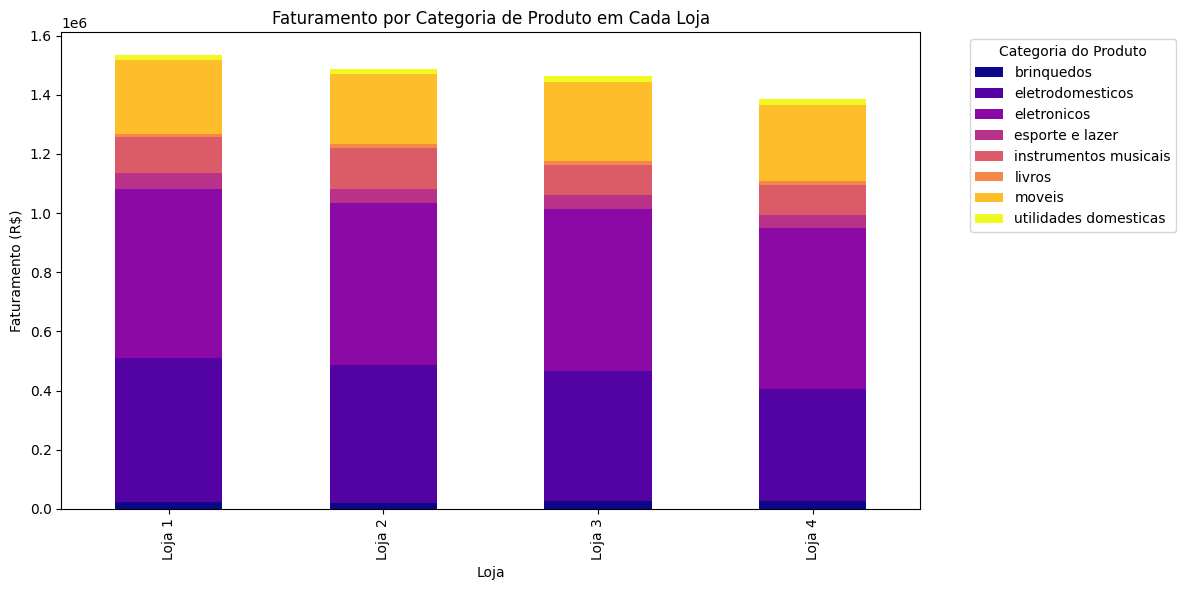

In [65]:
# Agrupar por Loja Origem e Categoria, somando os preços
faturamento_categoria = lojas.groupby(['Loja Origem', 'Categoria do Produto'])['Preço'].sum().unstack(fill_value=0)

# Plotar gráfico de barras empilhadas
ax = faturamento_categoria.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')  # usa rosa, roxo, laranja...

# Rótulos e título
plt.title('Faturamento por Categoria de Produto em Cada Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.legend(title='Categoria do Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [66]:
# Agrupar por Loja Origem e Categoria do Produto, somando os valores
tabela_faturamento = lojas.groupby(['Loja Origem', 'Categoria do Produto'])['Preço'].sum().unstack(fill_value=0)

# Arredondar para 2 casas decimais
tabela_faturamento = tabela_faturamento.round(2)

# Exibir a tabela
tabela_faturamento

Categoria do Produto,brinquedos,eletrodomesticos,eletronicos,esporte e lazer,instrumentos musicais,livros,moveis,utilidades domesticas
Loja Origem,,,,,,,,
Loja 1,23993.78,484913.36,572659.23,52387.55,121731.69,11713.92,250178.11,16931.48
Loja 2,21262.21,464758.13,547773.71,46326.09,139987.03,13454.35,235234.68,19662.86
Loja 3,25869.20,438984.89,547699.92,47456.10,103174.45,12664.70,268095.56,20080.21
Loja 4,27015.67,377680.65,545966.86,44465.65,100136.50,12427.77,256705.65,20098.83


In [58]:
# TICKET MÉDIO POR PRODUTO

# Faturamento total por categoria de produto
faturamento_categoria = lojas.groupby("Categoria do Produto")["Preço"].sum()

# Quantidade de vendas por categoria de produto
quantidade_vendas_categoria = lojas.groupby("Categoria do Produto").size()

# Cálculo do ticket médio por categoria
ticket_medio_categoria = (faturamento_categoria / quantidade_vendas_categoria).round(2)

ticket_medio_categoria.sort_values()


,0
Categoria do Produto,
livros,67.74
brinquedos,76.08
utilidades domesticas,105.17
esporte e lazer,171.28
moveis,535.64
instrumentos musicais,617.57
eletronicos,1249.49
eletrodomesticos,1537.28


## 3.1 Análise de Vendas por categoria

Como observado no início, a Loja 1 apresenta maior ticket médio de vendas. Este valor pôde ser obtido devido à maior concentração de vendas de itens como brinquedos e móveis.

Loja 4 tem melhores números na venda de utilidades domésticas, mas fica atrás nas categorias de alto ticket médio como instrumentos musicais e eletrônicos.

Produtos como instrumentos musicais, eletrônicos, e móveis têm tickets médios altos e boa performance nas vendas. Eles podem ser explorados para ações estratégicas, como pacotes promocionais que incluam acessórios ou serviços adicionais.

Esporte e lazer tem um ticket médio mediano, mas quantidade alta de vendas. Isso indica potencial para aumento de ticket com ações como lançamentos de produtos premium.


# 4. Média de Avaliação das Lojas

# 5. Produtos Mais e Menos Vendidos

# 6. Frete Médio por Loja
